In [16]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def bilinear(image, row, col):
    """
    Return the interpolated value for row, col in image.
    Assume rol, col are non-negative and less than the width and height of image -1

    Input- image: H x W
    row, col: floating point scalar
    Output - value: scalar
    """
    H, W = image.shape
    row_int = int(row)
    col_int = int(col)
    row_frac = row - row_int
    col_frac = col - col_int

    top_left = image[row_int, col_int]
    top_right = image[row_int, col_int + 1]
    bottom_left = image[row_int + 1, col_int]
    bottom_right = image[row_int + 1, col_int + 1]

    #interpolating along rows
    top = (1 - col_frac) * top_left + col_frac * top_right
    bottom = (1 - col_frac) * bottom_left + col_frac * bottom_right

    #interpolating along columns
    value = (1 - row_frac) * top + row_frac * bottom

    return value


In [18]:
def imshow(image, *args, **kwargs):
    if len(image.shape) == 3:
      # Height, width, channels
      # Assume BGR, do a conversion since
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    else:
      # Height, width - must be grayscale
      # convert to RGB, since matplotlib will plot in a weird colormap (instead of black = 0, white = 1)
      image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    # Draw the image
    plt.imshow(image, *args, **kwargs)
    # We'll also disable drawing the axes and tick marks in the plot, since it's actually an image
    plt.axis('off')
    # Make sure it outputs
    plt.show()

Mounted at /content/gdrive


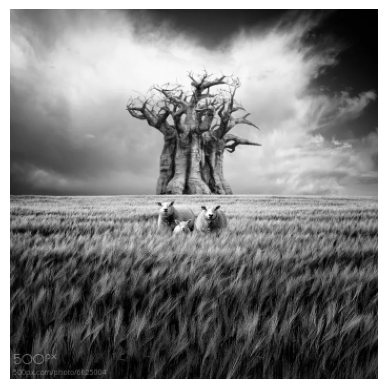

In [19]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
rootpath = '/content/gdrive/MyDrive/cs558_resources/imrot'
input = cv2.imread(os.path.join(rootpath, "bnw_small.png"))
input = cv2.cvtColor(input, cv2.COLOR_BGR2GRAY)
imshow(input)



In [20]:
output = np.zeros((int(1.45*input.shape[0]), int(1.45*input.shape[1])),dtype='uint8')

theta = np.radians(45) #setting rotation angle

H_in, W_in = input.shape
H_out, W_out = output.shape

#calculating center points
center_in = (H_in / 2, W_in / 2)
center_out = (H_out / 2, W_out / 2)

#rotation matrix
cos_theta = np.cos(theta)
sin_theta = np.sin(theta)

# Nearest-Neighbor Interpolation

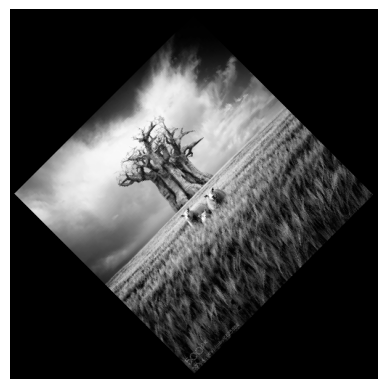

In [21]:
#looping through output pixels
for i in range(H_out):
    for j in range(W_out):
        #translating to center
        y_centered = i - center_out[0]
        x_centered = j - center_out[1]

        #inverse rotation
        y_src = cos_theta * y_centered + sin_theta * x_centered + center_in[0]
        x_src = -sin_theta * y_centered + cos_theta * x_centered + center_in[1]


        if (0 <= y_src < H_in - 1) and (0 <= x_src < W_in - 1):
            #nearest-neighbor interpolation
            output[i, j] = input[int(y_src), int(x_src)]


imshow(output)


# Bilinear Interpolation

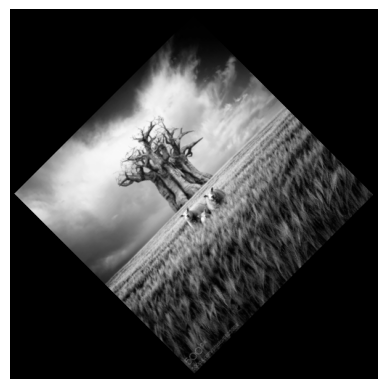

In [23]:
#looping through output pixels
for i in range(H_out):
    for j in range(W_out):
        #translating to center
        y_centered = i - center_out[0]
        x_centered = j - center_out[1]

        #inverse rotation
        y_src = cos_theta * y_centered + sin_theta * x_centered + center_in[0]
        x_src = -sin_theta * y_centered + cos_theta * x_centered + center_in[1]

        if (0 <= y_src < H_in - 1) and (0 <= x_src < W_in - 1):
            #bilinear interpolation
            output[i, j] = bilinear(input, y_src, x_src)


imshow(output)
